## SVM Checker

In [22]:
%matplotlib inline
import svm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools




def example(num_samples=20, num_features=2, grid_size=300, sigma=None):
    
    samples = np.matrix(np.random.normal(size=num_samples * num_features)
                        .reshape(num_samples, num_features))
    
    labels = 2 * (samples.sum(axis=1) > 0) - 1.0
    
    if sigma is None:
        trainer = svm.SVMTrainer(svm.Kernel.linear())
    else:
        trainer = svm.SVMTrainer(svm.Kernel.gaussian(sigma))
        
    predictor = trainer.train(samples, labels)

    plot(predictor, samples, labels, grid_size)


def plot(predictor, X, y, grid_size):
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, grid_size),
        np.linspace(y_min, y_max, grid_size),
        indexing='ij'
    )
    
    flatten = lambda m: np.array(m).reshape(-1,)

    result = []
    
    for (i, j) in itertools.product(range(grid_size), range(grid_size)):
        point = np.array([xx[i, j], yy[i, j]]).reshape(1, 2)
        result.append(predictor.predict(point))

    Z = np.array(result).reshape(xx.shape)
    
    plt.contourf(
        xx, yy, Z,
        cmap=cm.Paired,
        levels=[-0.01, 0.01],
        extend='both',
        alpha=0.45
    )
    
    
    plt.scatter(
        flatten(X[:, 0]),
        flatten(X[:, 1]),
        c=flatten(y),
        cmap=cm.Paired
    )
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

[[-0.6545924   1.8456091 ]
 [ 0.19423381  1.07087926]
 [-1.7406413  -0.7146244 ]
 [ 0.07759482  1.90144807]
 [ 0.47291928 -1.54470833]
 [-1.01623431  0.35364386]
 [-0.08672831  0.17032668]
 [ 0.55301933 -0.18174066]
 [ 1.10780809  0.67630771]
 [-0.79295644 -0.64511528]
 [ 0.70470005  1.46582093]
 [-1.368258   -0.09285306]
 [ 0.61876706  0.04376698]
 [ 0.57172511  1.35804296]
 [ 0.06033817 -0.18107042]
 [-0.4818199   1.37961974]
 [ 1.57654076 -0.40263014]
 [-0.3684851   0.45257113]
 [-2.28762325  0.53806148]
 [ 0.94774474  1.0810184 ]]
     pcost       dcost       gap    pres   dres
 0: -5.1904e+00 -1.5664e+01  5e+01  5e+00  2e+00
 1: -1.1510e+01 -2.0529e+01  2e+01  2e+00  8e-01
 2: -2.6226e+01 -3.7387e+01  2e+01  1e+00  6e-01
 3: -3.7027e+01 -4.1645e+01  7e+00  3e-01  1e-01
 4: -3.7061e+01 -3.7212e+01  2e-01  6e-03  3e-03
 5: -3.7098e+01 -3.7105e+01  8e-03  1e-04  4e-05
 6: -3.7102e+01 -3.7102e+01  5e-04  8e-07  4e-07
 7: -3.7102e+01 -3.7102e+01  6e-06  8e-09  4e-09
Optimal solution fo

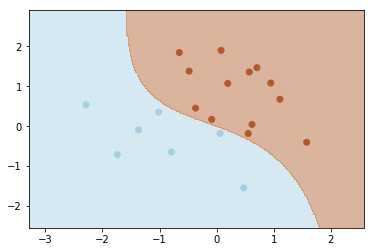

In [23]:
example(sigma=1)